<a href="https://colab.research.google.com/github/UBC-Astrophysics/QEDSurface/blob/master/IXPEObsSim/test_ixpe_file_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducing the `ixpe_file_model` module

## Requirements

* [IXPEObsSim](https://bitbucket.org/ixpesw/ixpeobssim/src/master/)
* Python
* [PyXSPEC](https://heasarc.gsfc.nasa.gov/docs/xanadu/xspec/python/html/index.html)
* [QEDSurface](https://github.com/UBC-Astrophysics/QEDSurface)

Documentation for IXPEObsSim:

https://cocalc.coolpulsars.org/636f9d55-17fa-4cc0-bb9c-ec4e36690581/raw/Neutron-Star-Atmosphere/ixpesw-ixpeobssim-572fa0092131/docs/_build/singlehtml/index.html#document-index

Similar documentation for XIMPOL:

https://buildmedia.readthedocs.org/media/pdf/ximpol/stable/ximpol.pdf

xwiki:

http://xwiki.ssdc.asi.it/xwiki/bin/view/Main/

Bitbucket:

https://bitbucket.org/ixpesw/ixpeobssim/src/master/


## Setting up the ixpe_file_model module


1.   You can find the [ixpe_file_model.py](https://github.com/UBC-Astrophysics/QEDSurface/blob/master/IXPEObsSim/config/ixpe_file_model.py) file in the [config](https://github.com/UBC-Astrophysics/QEDSurface/tree/master/IXPEObsSim/config) directory in the [QEDSurface](https://github.com/UBC-Astrophysics/QEDSurface) repository.
2.   You should make a copy the ixpe_file_model module to create a configuration file for your particular source.  
3. All of the key parameters are defined located at the top of the module.
4. At a minimum, you must define the following parametrers:
* Position of the source: `ra`, `dec`.
* Spin frequency, frequency first and second derivative: `nu0`, `nudot`, `nuddot`.
* File with spectral and polarization data: filename.
* Magnetic dipole geometry: `alpha` and `beta.
5. There are a few optional parameters:
* You can renormalize the phase-averaged flux before absorption to have a fixed value or to follow a given spectrum with the `normflux` parameter.  `normflux` can be a floating point number, an array of values corresponding to the energies listed in `filename`, a function or filename.
* You can apply interstellar absorption with the `NH` parameter.  `NH` can be a floating point number for the hydrogen column density or a string with a floating point number and filename: e.g. `"1e22;tbabs.dat"`. 
* You can also normalize the phase-average flux after absorption with the finalnorm parameter.
* As final step, the module assumes that your spectrum is in the units of counts/s/cm<sup>2</sup>/keV.  If it is in erg/s/cm<sup>2</sup>/keV, set `intensity_energy_units=True`, and it will perform the needed conversion.
6. The various files should be in the [config/ascii](https://github.com/UBC-Astrophysics/QEDSurface/tree/master/IXPEObsSim/config/ascii) directory.
7. The file that contains the spectral and polarization information (`filename`) must contain the following information with a header row at the top.
* Angle between the line of sight and the magnetic axis in radians: `Phi[rad]`
* Energy of radiation: `Energy[keV]`
* Intensity or flux: `I`
* Polarization with respect to the magnetic axis projected into the sky: `Q/I`

This file can contain other information, and the row and columns can be in any order.  The values of the angle and the energy must form a rectangular grid.
8. The file that contains the spectral renormalization information (`normflux`) must contain the following information with a header row at the top.
* Energy of radiation: `Energy[keV]`
* Flux: `I`
9. The file that contains the absoprtion cross section as a function of energy as defined in `NH` must contain the following information with a header row at the top.
* Energy of radiation in keV: `Energy`
* Cross section times <i>E</i><sup>3</sup> in units of 10<sup>-24</sup> cm<sup>2</sup> keV<sup>3</sup>: `sigma`.





 

## Components within the ixpe_file_model module

You can access all of the a forementioned parameters from outside the module as `ixpe_file_model.ra` for example.  There are many additional components defined with energy `E` in keV, inclination `i` in radians, phase `t` from 0 to 1:

* `energy_spectrum_inclination(E,i)`
* `ratio_inclination(E,i)`
* ` pol_deg(E, t, ra=None, dec=None)`
* `pol_ang(E, t, ra=None, dec=None)` in radians
* `rawspec(E,t)`: unabsorbed spectrum before renormalization
* `spec(E,t)`: absorbed counts spectrum after renormalization


# Simulation Steps

## Load libraries

In [1]:
import os     
import numpy
import matplotlib.pyplot as plt
from ixpeobssim import IXPEOBSSIM_CONFIG, IXPEOBSSIM_DATA, IXPEOBSSIM_DOC
import ixpeobssim.core.pipeline as pipeline
from ixpeobssim.utils.logging_ import logger

## Load the model

In [2]:
import ixpeobssim.config.ixpe_file_model as magnetar

## Display the model

Double_Blackbody.txt


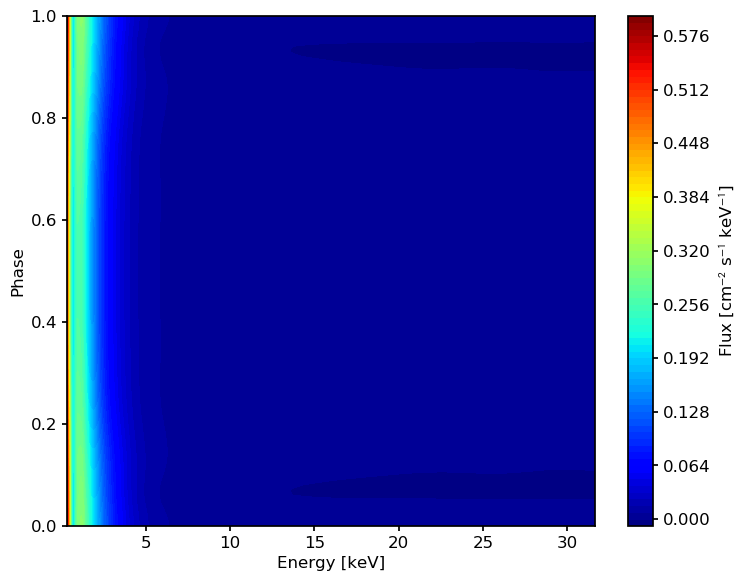

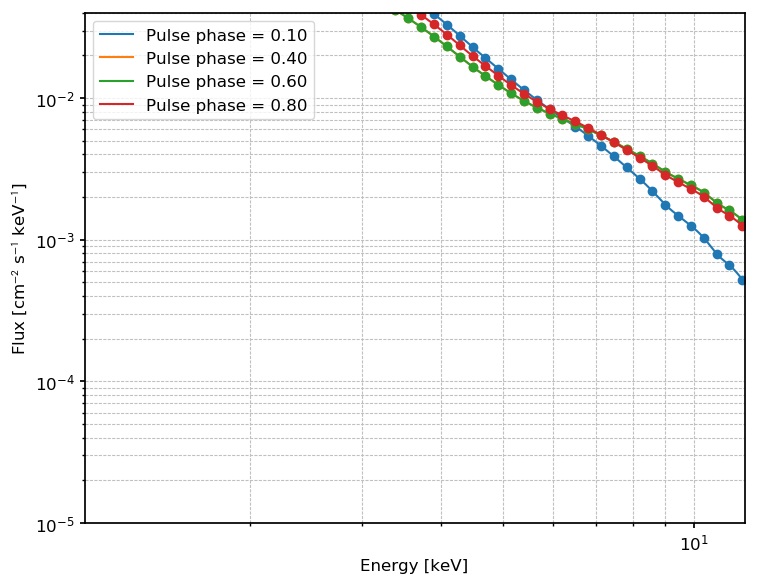

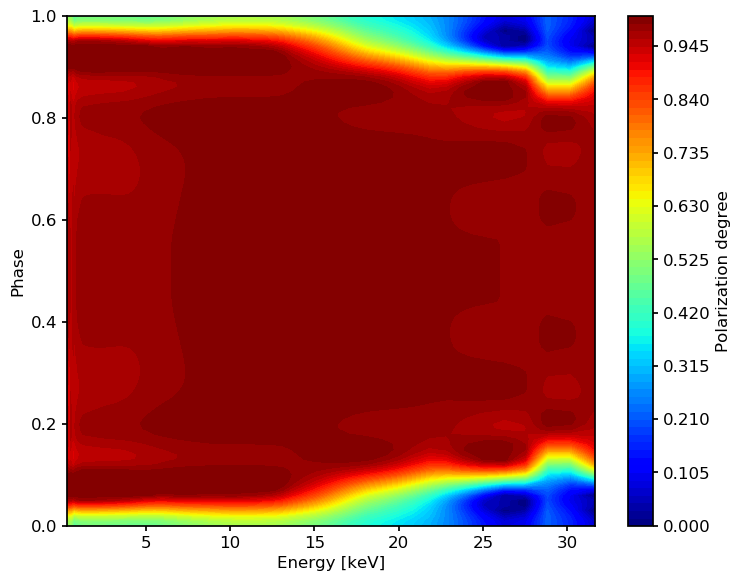

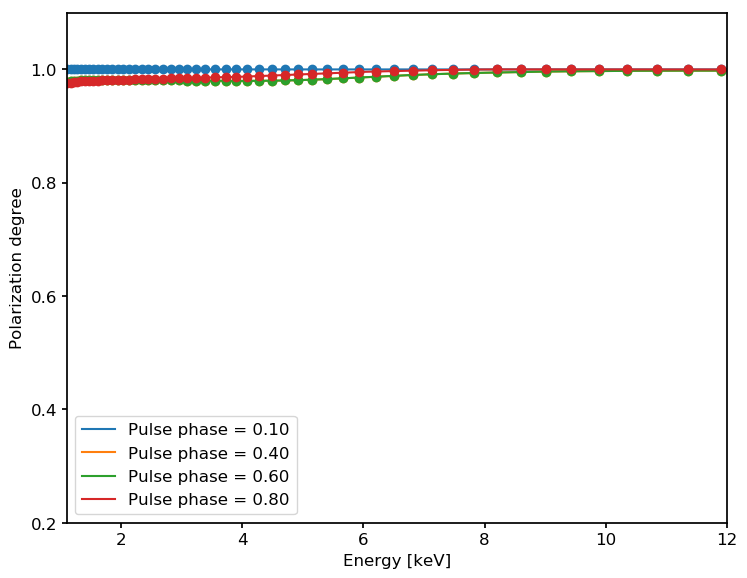

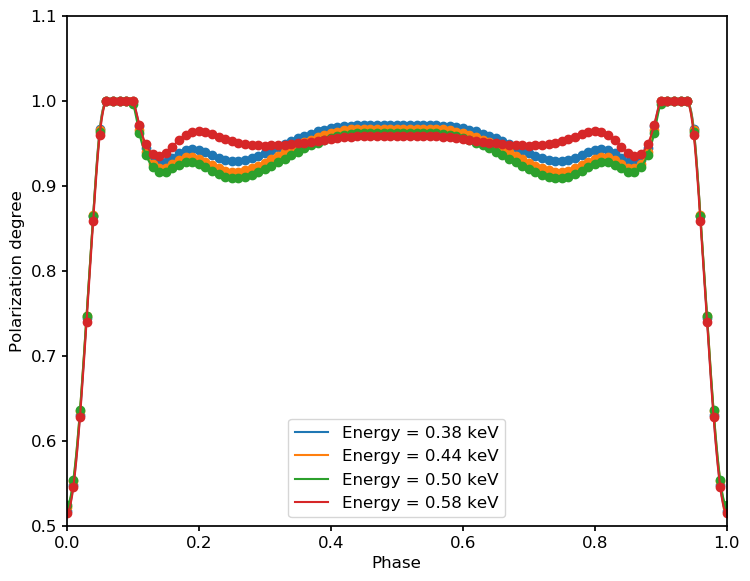

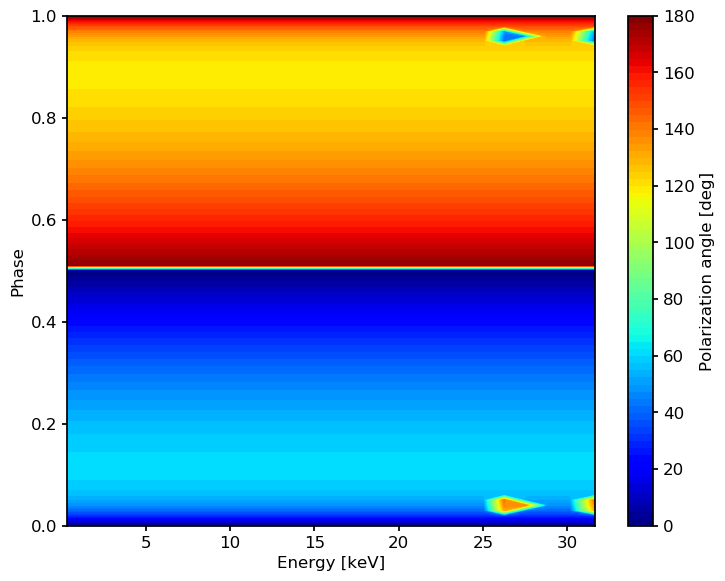

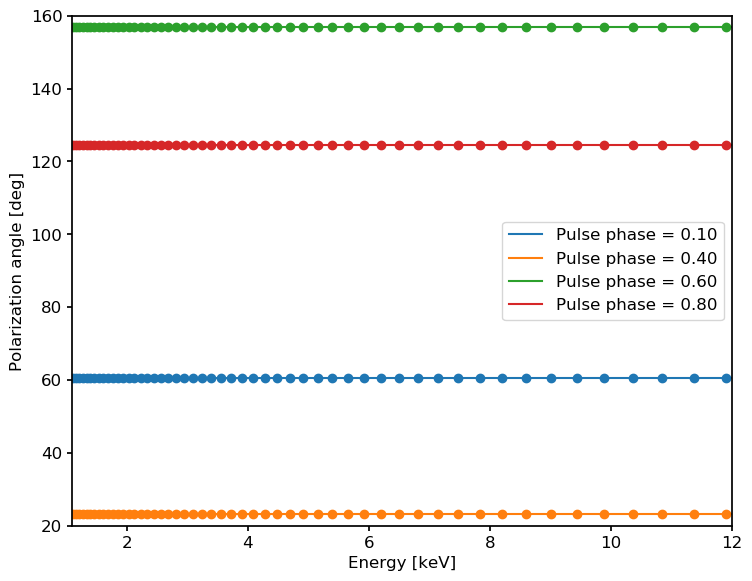

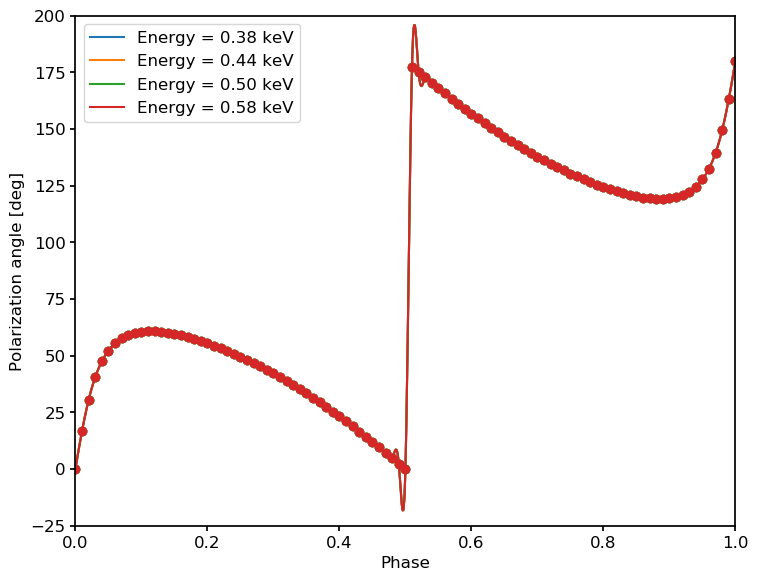

In [3]:
print(magnetar.filename)
magnetar.display()

## Phase-Averaged Spectrum

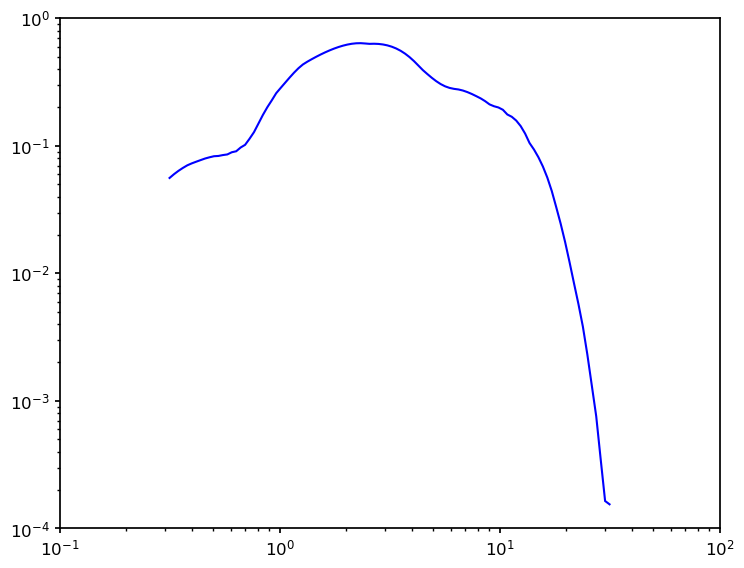

In [4]:
mfl=numpy.mean(magnetar.flux,axis=-1)
plt.loglog(magnetar.enerlist,magnetar.enerlist**2*mfl,'b')


## Phase-Averaged Q/I

Using the instantaneous projection of the magnetic moment into the sky as the basis


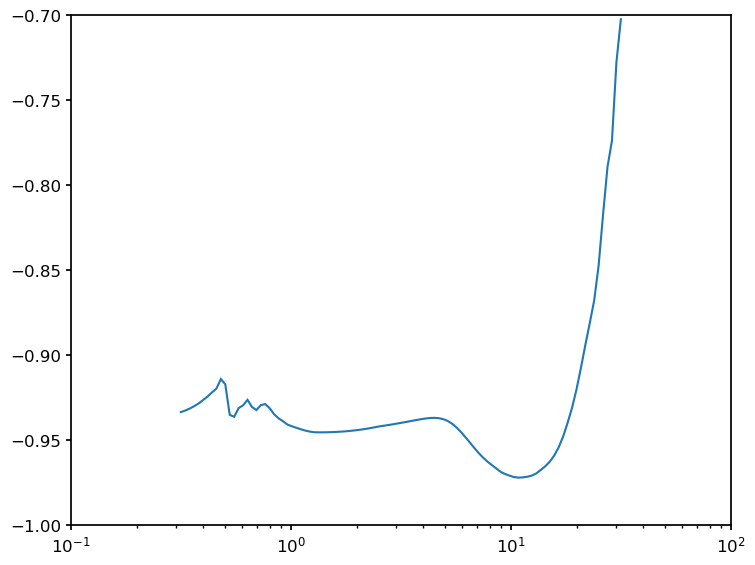

In [5]:
_t=numpy.linspace(0,1,101)
_tt,_ee=numpy.meshgrid(_t,magnetar.enerlist)
qfl=numpy.mean(magnetar.flux*magnetar.ratio_inclination(_ee,magnetar.inclination(_tt)),axis=-1)
plt.semilogx(magnetar.enerlist,qfl/mfl)


## Configure the simulation.

In [6]:
head,cfile=os.path.split(magnetar.__file__)
CFG_FILE = os.path.join(IXPEOBSSIM_CONFIG, cfile)
modulename=os.path.splitext(cfile)[0]
OUT_FILE_PATH_BASE = os.path.join(IXPEOBSSIM_DATA, modulename)
EVT_FILE_PATH = '%s.fits' % OUT_FILE_PATH_BASE
SIM_DURATION = 100000.
OUTPUT_FOLDER = os.path.join(IXPEOBSSIM_DOC, 'figures', 'showcase')


## Clean up

Remove output files from a previous run.

In [7]:
os.system('rm {}*'.format(OUT_FILE_PATH_BASE))

0

## Perform the simulation

In [8]:
EVT_FILE_PATH = pipeline.xpobssim(configfile=CFG_FILE, duration=SIM_DURATION)

>>> Setting output file base name to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model...


>>> Setting up the source model...


>>> ROI centered at (26.5934, 61.7509):
- xPeriodicPointSource "4U 0142+61" (id = 0)
    Galactic column density: 0.000e+00 cm^{-2}
    Redshift: 0.000
    Unabsorbed flux @ t = 0: 1.311e-09 erg/cm2/s (65.56 mcrab)
    Position: RA = 26.5933625 deg, Dec = 61.7508861111 deg
    Ephemeris: t0 = 0.0 s, nu0 = 0.11509211554 Hz, nudot = -2.6783806e-14 Hz/s, nuddot = 0.0 Hz/s^2


>>> Done [t0 + 0.132 s].


>>> Setting the random seed to 1923429168...


>>> Loading the instrument response functions...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu1stdcutv003.arf...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu1stdcutv003.arf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  SPECRESP      1 BinTableHDU     35   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.062931', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu1vignstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.062931', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu1vignstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  VIGNETTING    1 BinTableHDU     27   1R x 4C   [275E, 275E, 18E, 4950E]   


>>> Response file ixpemcdu1vignstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.245255', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu1stdcutv003.rmf...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.245255', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu1stdcutv003.rmf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  MATRIX        1 BinTableHDU     40   275R x 6C   [E, E, I, I, I, 275E]   
  2  EBOUNDS       1 BinTableHDU     35   275R x 3C   [I, E, E]   


>>> Response file ixpemcdu1stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.256145', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu1psfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.256145', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu1psfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  PSF           1 BinTableHDU     30   1R x 5C   [E, E, E, E, E]   


>>> Response file ixpemcdu1psfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.525812', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.525812', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Done [t0 + 0.934 s].


>>> Generating the photon list...


>>> Generating event list for "4U 0142+61"...


>>> Phase grid for sampling the light curve: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.8585

{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


>>> About to generate 636968 events...


>>> Applying the dithering pattern to the event list...


>>> A = 1.600 arcmin, pa = 907.000 s, px = 101.000 s, py = 449.000 s


>>> Applying vignetting to the event list...


>>> Done, 636968/636968 (100.00%) events remaining.


>>> Running time for apply_vignetting(): 0.113 s


>>> Applying GPD fiducial area cut to the event list...


>>> Done, 636968/636968 (100.00%) events remaining.


>>> Running time for apply_fiducial_area(): 0.020 s


>>> Applying dead time (0.00108) to the event list...


>>> Done, 632644/636968 (99.32%) events remaining, deadtime correction 0.993.


>>> Running time for apply_dead_time(): 0.251 s


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xLvl2PrimaryHDU     40   ()      
  1  EVENTS        1 xBinTableHDUEvents    101   632644R x 17C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 xBinTableHDUMonteCarlo     47   632644R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 xBinTableHDUGTI     29   1R x 2C   ['D', 'D']   
  4  ROITABLE      1 xBinTableHDURoiTable     16   1R x 2C   ['I', '20A']   


>>> Event list written to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


>>> Done for detector unit # 1 [t0 + 8.792 s].


>>> Setting the random seed to 1923429169...


>>> Loading the instrument response functions...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu2stdcutv003.arf...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu2stdcutv003.arf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  SPECRESP      1 BinTableHDU     35   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.567382', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu2vignstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.567382', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu2vignstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  VIGNETTING    1 BinTableHDU     27   1R x 4C   [275E, 275E, 18E, 4950E]   


>>> Response file ixpemcdu2vignstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.579084', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu2stdcutv003.rmf...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.579084', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu2stdcutv003.rmf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  MATRIX        1 BinTableHDU     40   275R x 6C   [E, E, I, I, I, 275E]   
  2  EBOUNDS       1 BinTableHDU     35   275R x 3C   [I, E, E]   


>>> Response file ixpemcdu2stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.588949', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu2psfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.588949', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu2psfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  PSF           1 BinTableHDU     30   1R x 5C   [E, E, E, E, E]   


>>> Response file ixpemcdu2psfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.854799', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.854799', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Done [t0 + 9.666 s].


>>> Generating the photon list...


>>> Generating event list for "4U 0142+61"...


>>> Phase grid for sampling the light curve: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.8585

{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


>>> About to generate 635801 events...


>>> Applying the dithering pattern to the event list...


>>> A = 1.600 arcmin, pa = 907.000 s, px = 101.000 s, py = 449.000 s


>>> Applying vignetting to the event list...


>>> Done, 635801/635801 (100.00%) events remaining.


>>> Running time for apply_vignetting(): 0.159 s


>>> Applying GPD fiducial area cut to the event list...


>>> Done, 635801/635801 (100.00%) events remaining.


>>> Running time for apply_fiducial_area(): 0.021 s


>>> Applying dead time (0.00108) to the event list...


>>> Done, 631357/635801 (99.30%) events remaining, deadtime correction 0.993.


>>> Running time for apply_dead_time(): 0.342 s


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xLvl2PrimaryHDU     40   ()      
  1  EVENTS        1 xBinTableHDUEvents    101   631357R x 17C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 xBinTableHDUMonteCarlo     47   631357R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 xBinTableHDUGTI     29   1R x 2C   ['D', 'D']   
  4  ROITABLE      1 xBinTableHDURoiTable     16   1R x 2C   ['I', '20A']   


>>> Event list written to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


>>> Done for detector unit # 2 [t0 + 17.719 s].


>>> Setting the random seed to 1923429170...


>>> Loading the instrument response functions...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu3stdcutv003.arf...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu3stdcutv003.arf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  SPECRESP      1 BinTableHDU     35   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.896001', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu3vignstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.896001', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu3vignstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  VIGNETTING    1 BinTableHDU     27   1R x 4C   [275E, 275E, 18E, 4950E]   


>>> Response file ixpemcdu3vignstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.907723', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu3stdcutv003.rmf...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.907723', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu3stdcutv003.rmf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  MATRIX        1 BinTableHDU     40   275R x 6C   [E, E, I, I, I, 275E]   
  2  EBOUNDS       1 BinTableHDU     35   275R x 3C   [I, E, E]   


>>> Response file ixpemcdu3stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.917267', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu3psfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.917267', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu3psfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  PSF           1 BinTableHDU     30   1R x 5C   [E, E, E, E, E]   


>>> Response file ixpemcdu3psfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.187659', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.187659', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Done [t0 + 18.536 s].


>>> Generating the photon list...


>>> Generating event list for "4U 0142+61"...


>>> Phase grid for sampling the light curve: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.8585

{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


>>> About to generate 635900 events...


>>> Applying the dithering pattern to the event list...


>>> A = 1.600 arcmin, pa = 907.000 s, px = 101.000 s, py = 449.000 s


>>> Applying vignetting to the event list...


>>> Done, 635900/635900 (100.00%) events remaining.


>>> Running time for apply_vignetting(): 0.109 s


>>> Applying GPD fiducial area cut to the event list...


>>> Done, 635900/635900 (100.00%) events remaining.


>>> Running time for apply_fiducial_area(): 0.070 s


>>> Applying dead time (0.00108) to the event list...


>>> Done, 631446/635900 (99.30%) events remaining, deadtime correction 0.993.


>>> Running time for apply_dead_time(): 0.331 s


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xLvl2PrimaryHDU     40   ()      
  1  EVENTS        1 xBinTableHDUEvents    101   631446R x 17C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 xBinTableHDUMonteCarlo     47   631446R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 xBinTableHDUGTI     29   1R x 2C   ['D', 'D']   
  4  ROITABLE      1 xBinTableHDURoiTable     16   1R x 2C   ['I', '20A']   


>>> Event list written to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


>>> Done for detector unit # 3 [t0 + 26.483 s].


>>> All done [t0 + 26.484 s]!


In [9]:
EVT_FILE_PATH

['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits']

# Basic Analysis

## Generate a count map and plot it

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   632644R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_cmap.fits...


>>> Setting xref to 26.5933625...


>>> Setting yref to 61.7508861111...


>>> Output image is 17.5 x 17.5 arcmin.


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     51   (200, 200)   float64   


>>> Writing CMAP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_cmap.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   631357R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_cmap.fits...


>>> Setting xref to 26.5933625...


>>> Setting yref to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


>>> Output image is 17.5 x 17.5 arcmin.


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     51   (200, 200)   float64   


>>> Writing CMAP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_cmap.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   631446R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_cmap.fits...


>>> Setting xref to 26.5933625...


>>> Setting yref to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


>>> Output image is 17.5 x 17.5 arcmin.


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     51   (200, 200)   float64   


>>> Writing CMAP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_cmap.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


>>> Reading FITS image from /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_cmap.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_cmap.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   (200, 200)   float64   


>>> Reading FITS image from /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_cmap.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_cmap.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   (200, 200)   float64   


>>> Reading FITS image from /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_cmap.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_cmap.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   (200, 200)   float64   


INFO: Auto-setting vmin to -9.450e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.049e+05 [aplpy.core]


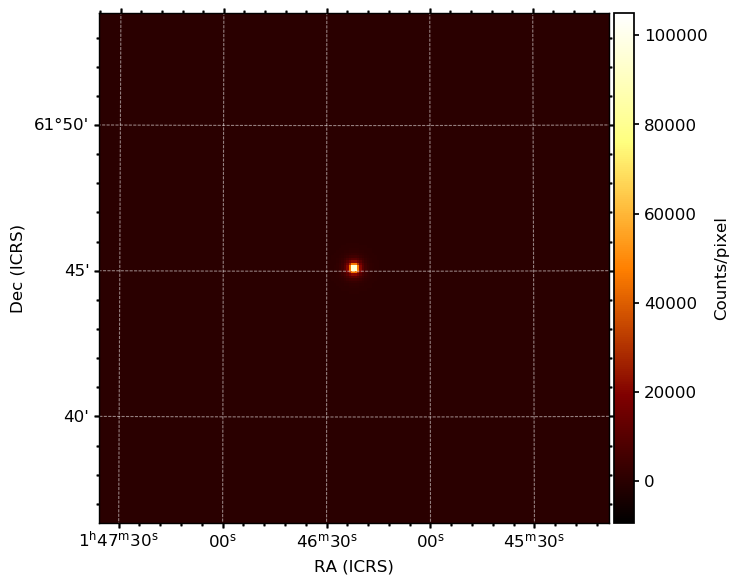

In [10]:

from ixpeobssim.evt.binning import xBinnedMap
 
cmap_file_list=pipeline.xpbin(*EVT_FILE_PATH, algorithm='CMAP')
count_map = xBinnedMap.from_file_list(cmap_file_list)
count_map.plot()


## Generate a light curve

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   632644R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_lc.fits...


>>> Setting tmin to 0.0...


>>> Setting tmax to 100000.0...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDULC     38   100R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Writing LC binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_lc.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   631357R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_lc.fits...


>>> Setting tmin to 0.0...


>>> Setting tmax to 100000.0...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDULC     38   100R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Writing LC binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_lc.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   631446R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_lc.fits...


>>> Setting tmin to 0.0...


>>> Setting tmax to 100000.0...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDULC     38   100R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   ['D', 'D']   


>>> Writing LC binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_lc.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_lc.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   100R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_lc.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   100R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_lc.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   100R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


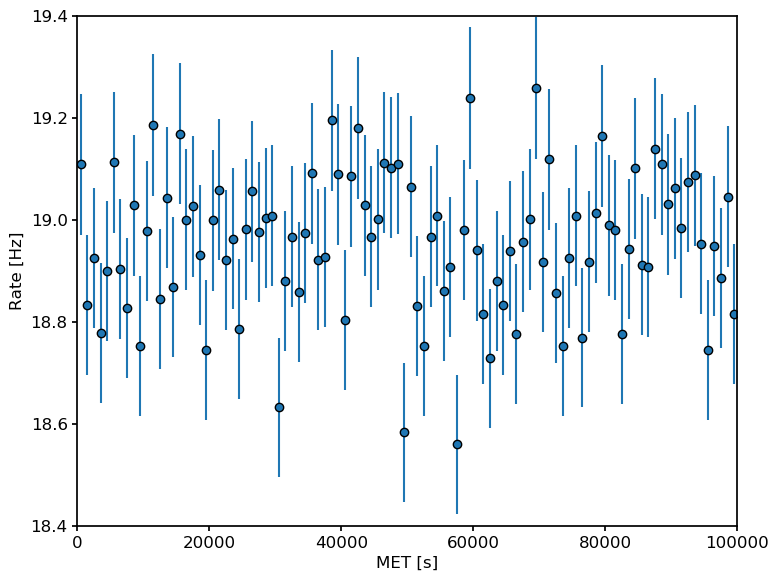

In [11]:
from ixpeobssim.evt.binning import xBinnedLightCurve

lc_file_list=pipeline.xpbin(*EVT_FILE_PATH, algorithm='LC')
count_lc = xBinnedLightCurve.from_file_list(lc_file_list)
count_lc.plot()

## Generate a spectrum

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   632644R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_pha1.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     52   275R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_pha1.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   631357R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_pha1.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     52   275R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_pha1.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    101   631446R x 17C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_pha1.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  SPECTRUM      1 xBinTableHDUPHA1     52   275R x 3C   ['J', 'E', 'E']   


>>> Writing PHA1 binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_pha1.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits...


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_pha1.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_pha1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  SPECTRUM      1 BinTableHDU     52   275R x 3C   [J, E, E]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_pha1.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_pha1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  SPECTRUM      1 BinTableHDU     52   275R x 3C   [J, E, E]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_pha1.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_pha1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  SPECTRUM      1 BinTableHDU     52   275R x 3C   [J, E, E]   


>>> Underlying binned file closed.


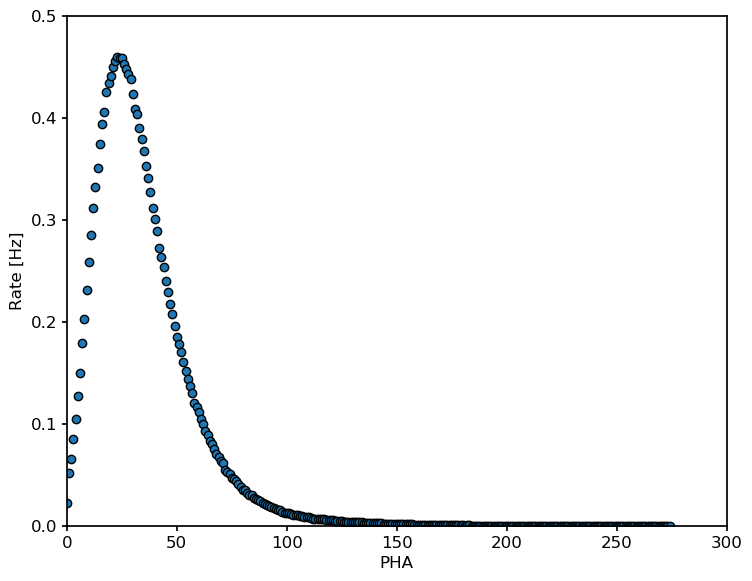

In [12]:
from ixpeobssim.evt.binning import xBinnedCountSpectrum

pha1_file_path = pipeline.xpbin(*EVT_FILE_PATH, algorithm='PHA1')
pha1_data = xBinnedCountSpectrum.from_file_list(pha1_file_path)
pha1_data.plot()


# Pulse Folding

## Calculate phases

In [13]:
folded_EVT_FILE_PATH=pipeline.xptimetophase(*EVT_FILE_PATH, configfile=CFG_FILE,suffix='folded')

>>> Opening "/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits"...


>>> Creating phase column...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



>>> Writing to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Opening "/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2.fits"...


>>> Creating phase column...


>>> Writing to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Opening "/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3.fits"...


>>> Creating phase column...


>>> Writing to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Done!


## Plot the pulse profile

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_pp.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDUPP     38   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing PP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_pp.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_pp.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDUPP     38   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing PP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_pp.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_pp.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     36   ()      
  1  RATE          1 xBinTableHDUPP     38   50R x 4C   ['D', 'D', 'J', 'E']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing PP binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_pp.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_pp.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_pp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   50R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_pp.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_pp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   50R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_pp.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_pp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  RATE          1 BinTableHDU     38   50R x 4C   [D, D, J, E]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


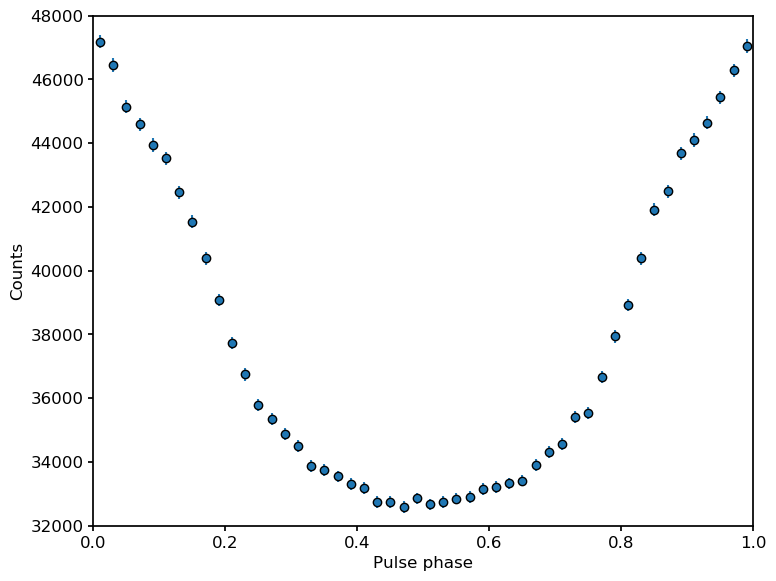

In [14]:
from ixpeobssim.evt.binning import xBinnedPulseProfile

prof_file_path = pipeline.xpbin(*folded_EVT_FILE_PATH, algorithm='PP')
prof_data = xBinnedPulseProfile.from_file_list(prof_file_path)
prof_data.plot()


# Look at polarization    

## Divide events in phase bins

In [15]:
from ixpeobssim.evt.binning import pairwise_enum
PHASE_BINNING = numpy.concatenate((numpy.linspace(0,0.2,11),numpy.linspace(0.3,0.7,11),numpy.linspace(0.8,1.0,11)))

for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
        pipeline.xpselect(*folded_EVT_FILE_PATH, phasemin=min_, phasemax=max_,
                          suffix=pipeline.suffix('phase', i),overwrite=True)



>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits'}...


>>> Done, 15928 events out of 632644 left.


>>> Filtering in place event file (15928 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15928R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15928R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits'}...


>>> Done, 15696 events out of 631357 left.


>>> Filtering in place event file (15696 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15696R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15696R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits'}...


>>> Done, 15566 events out of 631446 left.


>>> Filtering in place event file (15566 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15566R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15566R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits'}...


>>> Done, 15419 events out of 632644 left.


>>> Filtering in place event file (15419 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15419R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15419R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits'}...


>>> Done, 15535 events out of 631357 left.


>>> Filtering in place event file (15535 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15535R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15535R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits'}...


>>> Done, 15502 events out of 631446 left.


>>> Filtering in place event file (15502 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15502R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15502R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002.fits...


>>> Setting ra to 26.5933625...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60107R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   601…

>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0010', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.2, 'phasemax': 0.3, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits'}...


>>> Done, 60330 events out of 631446 left.


>>> Filtering in place event file (60330 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60330R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   60330R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits'}...


>>> Done, 22790 events out of 632644 left.


>>> Filtering in place event file (22790 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22790R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22790R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits'}...


>>> Done, 22808 events out of 631357 left.


>>> Filtering in place event file (22808 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22808R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22808R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits'}...


>>> Done, 22770 events out of 631446 left.


>>> Filtering in place event file (22770 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22770R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22770R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits'}...


>>> Done, 22345 events out of 632644 left.


>>> Filtering in place event file (22345 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22345R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22345R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits'}...


>>> Done, 22712 events out of 631357 left.


>>> Filtering in place event file (22712 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22712R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22712R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits'}...


>>> Done, 22244 events out of 631446 left.


>>> Filtering in place event file (22244 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22244R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22244R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits'}...


>>> Done, 22214 events out of 632644 left.


>>> Filtering in place event file (22214 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22214R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22214R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits'}...


>>> Done, 22105 events out of 631357 left.


>>> Filtering in place event file (22105 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22105R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22105R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits'}...


>>> Done, 22166 events out of 631446 left.


>>> Filtering in place event file (22166 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22166R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22166R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits'}...


>>> Done, 21705 events out of 632644 left.


>>> Filtering in place event file (21705 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21705R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21705R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits'}...


>>> Done, 21767 events out of 631357 left.


>>> Filtering in place event file (21767 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21767R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21767R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits'}...


>>> Done, 22024 events out of 631446 left.


>>> Filtering in place event file (22024 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22024R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22024R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits'}...


>>> Done, 21843 events out of 632644 left.


>>> Filtering in place event file (21843 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21843R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21843R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits'}...


>>> Done, 21789 events out of 631357 left.


>>> Filtering in place event file (21789 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21789R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21789R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits'}...


>>> Done, 21817 events out of 631446 left.


>>> Filtering in place event file (21817 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21817R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21817R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits'}...


>>> Done, 21728 events out of 632644 left.


>>> Filtering in place event file (21728 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21728R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21728R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits'}...


>>> Done, 21709 events out of 631357 left.


>>> Filtering in place event file (21709 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21709R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21709R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits'}...


>>> Done, 21975 events out of 631446 left.


>>> Filtering in place event file (21975 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21975R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21975R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits'}...


>>> Done, 21714 events out of 632644 left.


>>> Filtering in place event file (21714 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21714R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21714R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits'}...


>>> Done, 22017 events out of 631357 left.


>>> Filtering in place event file (22017 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22017R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22017R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits'}...


>>> Done, 22022 events out of 631446 left.


>>> Filtering in place event file (22022 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22022R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22022R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits'}...


>>> Done, 22025 events out of 632644 left.


>>> Filtering in place event file (22025 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22025R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22025R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits'}...


>>> Done, 22318 events out of 631357 left.


>>> Filtering in place event file (22318 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22318R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22318R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits'}...


>>> Done, 22027 events out of 631446 left.


>>> Filtering in place event file (22027 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22027R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22027R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits'}...


>>> Done, 22298 events out of 632644 left.


>>> Filtering in place event file (22298 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22298R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22298R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits'}...


>>> Done, 22237 events out of 631357 left.


>>> Filtering in place event file (22237 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22237R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22237R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits'}...


>>> Done, 22206 events out of 631446 left.


>>> Filtering in place event file (22206 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22206R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22206R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits'}...


>>> Done, 22831 events out of 632644 left.


>>> Filtering in place event file (22831 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22831R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22831R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits'}...


>>> Done, 22662 events out of 631357 left.


>>> Filtering in place event file (22662 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22662R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22662R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits'}...


>>> Done, 22726 events out of 631446 left.


>>> Filtering in place event file (22726 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22726R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22726R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits'}...


>>> Done, 60312 events out of 632644 left.


>>> Filtering in place event file (60312 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60312R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   60312R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits'}...


>>> Done, 60152 events out of 631357 left.


>>> Filtering in place event file (60152 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60152R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   60152R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits'}...


>>> Done, 59670 events out of 631446 left.


>>> Filtering in place event file (59670 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   59670R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   59670R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits'}...


>>> Done, 12990 events out of 632644 left.


>>> Filtering in place event file (12990 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12990R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   12990R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits'}...


>>> Done, 13083 events out of 631357 left.


>>> Filtering in place event file (13083 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13083R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13083R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits'}...


>>> Done, 12852 events out of 631446 left.


>>> Filtering in place event file (12852 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12852R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   12852R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits'}...


>>> Done, 13534 events out of 632644 left.


>>> Filtering in place event file (13534 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13534R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13534R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits'}...


>>> Done, 13384 events out of 631357 left.


>>> Filtering in place event file (13384 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13384R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13384R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits'}...


>>> Done, 13466 events out of 631446 left.


>>> Filtering in place event file (13466 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13466R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13466R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits'}...


>>> Done, 13845 events out of 632644 left.


>>> Filtering in place event file (13845 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13845R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13845R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits'}...


>>> Done, 14153 events out of 631357 left.


>>> Filtering in place event file (14153 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14153R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14153R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits'}...


>>> Done, 13922 events out of 631446 left.


>>> Filtering in place event file (13922 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13922R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13922R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits'}...


>>> Done, 14140 events out of 632644 left.


>>> Filtering in place event file (14140 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14140R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14140R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits'}...


>>> Done, 14179 events out of 631357 left.


>>> Filtering in place event file (14179 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14179R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14179R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits'}...


>>> Done, 14178 events out of 631446 left.


>>> Filtering in place event file (14178 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14178R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14178R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits'}...


>>> Done, 14662 events out of 632644 left.


>>> Filtering in place event file (14662 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14662R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14662R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits'}...


>>> Done, 14396 events out of 631357 left.


>>> Filtering in place event file (14396 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14396R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14396R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits'}...


>>> Done, 14623 events out of 631446 left.


>>> Filtering in place event file (14623 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14623R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14623R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits'}...


>>> Done, 14605 events out of 632644 left.


>>> Filtering in place event file (14605 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14605R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14605R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits'}...


>>> Done, 14642 events out of 631357 left.


>>> Filtering in place event file (14642 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14642R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14642R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits'}...


>>> Done, 14854 events out of 631446 left.


>>> Filtering in place event file (14854 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14854R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14854R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits'}...


>>> Done, 14930 events out of 632644 left.


>>> Filtering in place event file (14930 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14930R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14930R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits'}...


>>> Done, 14899 events out of 631357 left.


>>> Filtering in place event file (14899 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14899R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14899R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits'}...


>>> Done, 14817 events out of 631446 left.


>>> Filtering in place event file (14817 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14817R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14817R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits'}...


>>> Done, 15085 events out of 632644 left.


>>> Filtering in place event file (15085 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15085R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15085R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits'}...


>>> Done, 15193 events out of 631357 left.


>>> Filtering in place event file (15193 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15193R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15193R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits'}...


>>> Done, 15157 events out of 631446 left.


>>> Filtering in place event file (15157 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15157R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15157R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits'}...


>>> Done, 15712 events out of 632644 left.


>>> Filtering in place event file (15712 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15712R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15712R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits'}...


>>> Done, 15137 events out of 631357 left.


>>> Filtering in place event file (15137 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15137R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15137R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits'}...


>>> Done, 15434 events out of 631446 left.


>>> Filtering in place event file (15434 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15434R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15434R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits'}...


>>> Done, 15744 events out of 632644 left.


>>> Filtering in place event file (15744 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15744R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15744R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits'}...


>>> Done, 15652 events out of 631357 left.


>>> Filtering in place event file (15652 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15652R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15652R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits'}...


>>> Done, 15662 events out of 631446 left.


>>> Filtering in place event file (15662 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15662R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15662R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


## Generate MCUBE files

This contain the Stokes parameters for each energy and phase bin.

In [16]:
ENERGY_BINNING = numpy.array([2., 4., 8.])


for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
    file_list = ['%s_phase%04d.fits'% (s[:-5],i)   for s in folded_EVT_FILE_PATH]
    pipeline.xpbin(*file_list, algorithm='MCUBE', ebinalg='LIST',ebinning=ENERGY_BINNING,overwrite=True)



>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15928R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15928R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15696R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15696R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15566R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15566R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15419R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15419R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15535R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15535R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15502R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15502R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14940R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14940R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-…

>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60107R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   60107R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60330R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   60330R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22790R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22790R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22808R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22808R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22770R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22770R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22345R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22345R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22712R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22712R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22244R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22244R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22214R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22214R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22105R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22105R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22166R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22166R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21705R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21705R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21767R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21767R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22024R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22024R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21843R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21843R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21789R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21789R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21817R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21817R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21728R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21728R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21709R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21709R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21975R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21975R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21714R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21714R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22017R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22017R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22022R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22022R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22025R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22025R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22318R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22318R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22027R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22027R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22298R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22298R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22237R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22237R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22206R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22206R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22831R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22831R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22662R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22662R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22726R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22726R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60312R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   60312R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60152R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   60152R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   59670R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   59670R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12990R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   12990R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13083R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13083R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12852R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   12852R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13534R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13534R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13384R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13384R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13466R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13466R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14153R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14153R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13922R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13922R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14140R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14140R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14179R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14179R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14178R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14178R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14662R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14662R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14396R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14396R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14623R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14623R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14605R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14605R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14642R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14642R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14854R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14854R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14930R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14930R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   

>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14899R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14899R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14817R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14817R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15085R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15085R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15193R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15193R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15157R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15157R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15712R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15712R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15137R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15137R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15434R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15434R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15744R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15744R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15652R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15652R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15662R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15662R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031.fits...


## Load the MCUBE data into Python

In [17]:
from ixpeobssim.evt.binning import xEventBinningBase, xBinnedModulationCube  

phase = numpy.linspace(0., 1., 100)
phase_bins = xEventBinningBase.bin_centers(PHASE_BINNING)
shape = (len(ENERGY_BINNING) - 1, len(PHASE_BINNING) - 1)
pol_deg = numpy.zeros(shape)
pol_deg_err = numpy.zeros(shape)
pol_ang = numpy.zeros(shape)
pol_ang_err = numpy.zeros(shape)
emean = numpy.zeros(shape)
for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
    file_list = ['%s_phase%04d_mcube.fits'% (s[:-5],i)   for s in folded_EVT_FILE_PATH]

    mcube = xBinnedModulationCube.from_file_list(file_list)
    pol_deg[:,i] = mcube.pol_deg
    pol_deg_err[:,i] = mcube.pol_deg_err
    pol_ang[:,i] = mcube.pol_ang
    pol_ang_err[:,i] = mcube.pol_ang_err
    emean[:,i] = mcube.energy_mean


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0000_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0000_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0000_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0001_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0001_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0001_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0002_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0002_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0002_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0002_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0002_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0003_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0003_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0003_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0003_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0003_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0003_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0004_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0004_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0004_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0004_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0004_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0004_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0005_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0005_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0005_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0005_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0005_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0005_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0006_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0006_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0006_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0006_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0006_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0006_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0007_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0007_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0007_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0007_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0007_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0007_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0008_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0008_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0008_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0008_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0008_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0008_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0009_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0009_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0009_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0009_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0009_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0009_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0010_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0010_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0010_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0011_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0011_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0011_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0012_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0012_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0012_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0013_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0013_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0013_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0014_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0014_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0014_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0015_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0015_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0015_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0016_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0016_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0016_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0017_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0017_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0017_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0018_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0018_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0018_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0019_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0019_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0019_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0020_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0020_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0020_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0021_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0021_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0021_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0022_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0022_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0022_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0023_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0023_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0023_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0024_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0024_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0024_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0025_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0025_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0025_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0026_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0026_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0026_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0027_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0027_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0027_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0028_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0028_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0028_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0029_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0029_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0029_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0030_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0030_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0030_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_phase0031_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_phase0031_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_phase0031_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


## Plot the polarization degree

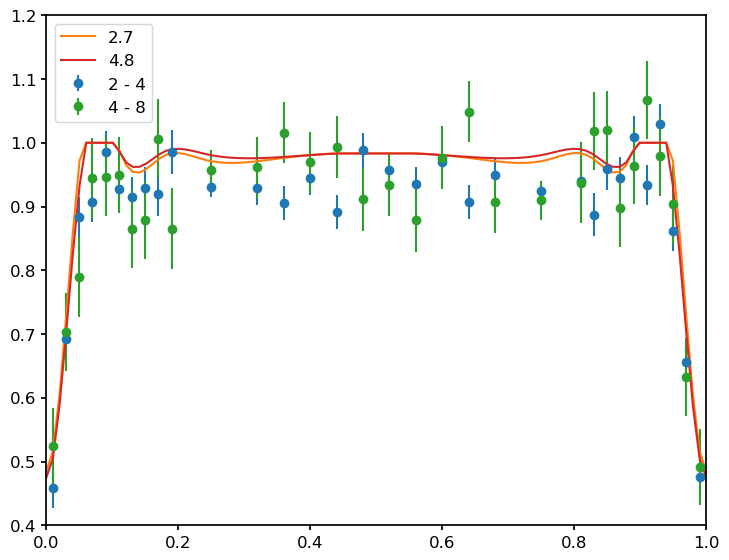

In [18]:
for i, (min_, max_) in pairwise_enum(ENERGY_BINNING):
    plt.errorbar(phase_bins, pol_deg[i,:], pol_deg_err[i,:], fmt='o',
                         label='%g - %g' % (min_, max_))
    energy = numpy.nanmean(emean[i,:])
    plt.plot(phase, magnetar.pol_deg(energy, phase),label='%2.1f' % energy        )
plt.legend()

## Plot the polarization angle

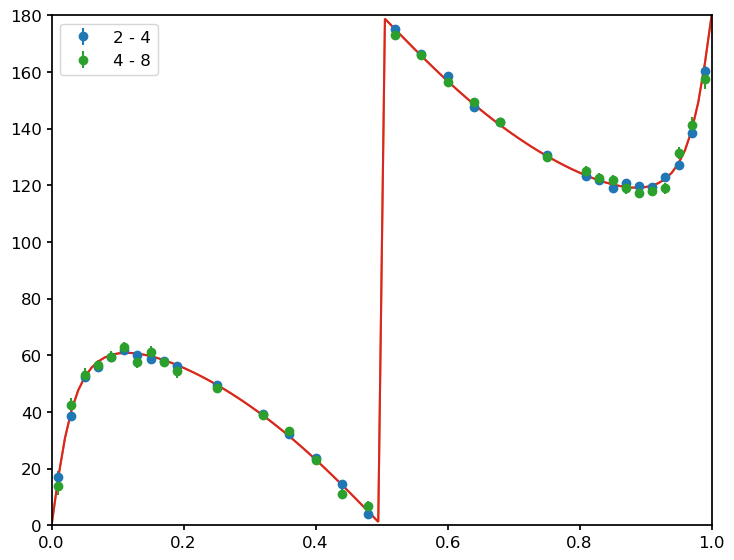

In [19]:
for i, (min_, max_) in pairwise_enum(ENERGY_BINNING):
    plt.errorbar(phase_bins, numpy.mod(pol_ang[i,:],180), pol_ang_err[i,:], fmt='o',
                     label='%g - %g' % (min_, max_))
    energy = numpy.nanmean(emean[i,:])
    plt.plot(phase, numpy.degrees(magnetar.pol_ang(energy, phase) )    )
plt.legend()

# Look at phase-averaged polarization

## Create an MCUBE with finer energy bins

In [20]:
ENERGY_BINNING2 = numpy.array([2., 3., 4., 6., 8.])

pipeline.xpbin(*folded_EVT_FILE_PATH, algorithm='MCUBE', ebinalg='LIST',ebinning=ENERGY_BINNING2,overwrite=True)

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded.fits...


['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits']

## Load the MCUBE data into Python

In [21]:
file_list = ['%s_mcube.fits'% (s[:-5],)   for s in folded_EVT_FILE_PATH]

mcube2 = xBinnedModulationCube.from_file_list(file_list)
pol_deg2 = mcube2.pol_deg
pol_deg2_err= mcube2.pol_deg_err
pol_ang2 = mcube2.pol_ang
pol_ang2_err = mcube2.pol_ang_err
emean2 = mcube2.energy_mean

>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_folded_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   4R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_folded_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   4R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_folded_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   4R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


## Plot angle vs. energy

<ErrorbarContainer object of 3 artists>

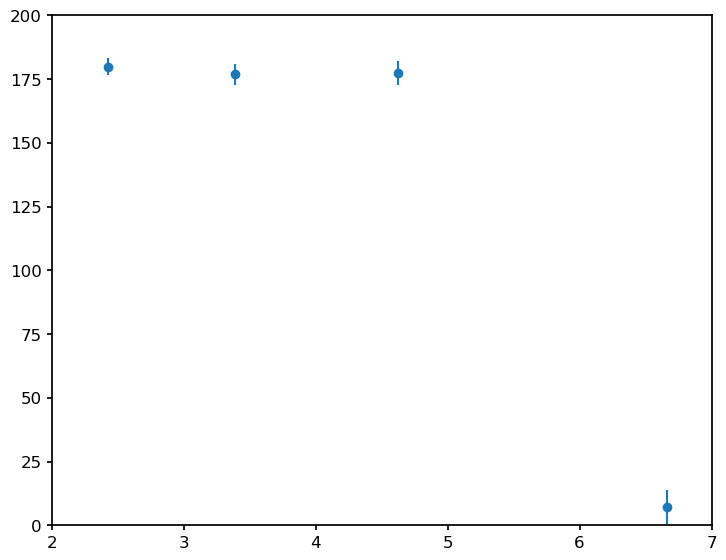

In [22]:
plt.errorbar(emean2, numpy.mod(pol_ang2,180), pol_ang2_err, fmt='o') 

## Plot polarization degree vs energy

<ErrorbarContainer object of 3 artists>

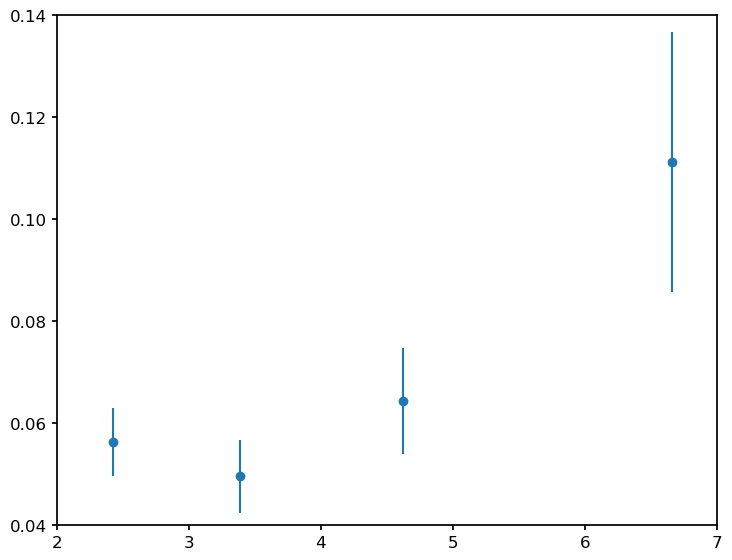

In [23]:
plt.errorbar(emean2, pol_deg2, pol_deg2_err, fmt='o')

# Polarization Relative to Model

Let's calculate the angle between the electric vector measured for each photon and the model value of the polarization at the phase of arrival of the photon

## Load fits libary

In [24]:
from astropy.io import fits

## Rotate the polarization direction of each photon

Each photon has a value of `PHI`, the polarization angle relative to North and the corresponding `U` and `Q` values.  We replace `PHI` with the difference between the observed angle and an angle from the model at the `PHASE` of arrival of the photon.  We also replace `U` and `Q`.

The FITS file does not contain the energy explicitly but one could translate `PHA` values to energy to rotate relative to the model at a particular energy.

In [25]:
rotated_EVT_FILE_PATH=[]
for f in folded_EVT_FILE_PATH:
    fnew=f.replace('folded','rotated')
    with fits.open(f) as hdul:
        hdul[1].data['PHI']=hdul[1].data['PHI']-magnetar.pol_ang(2.4, hdul[1].data['PHASE'])
        hdul[1].data['PHE_U']= 2 * numpy.sin(2 * hdul[1].data['PHI'])  
        hdul[1].data['PHE_Q']= 2 * numpy.cos(2 * hdul[1].data['PHI'])  
        hdul.writeto(fnew)
        rotated_EVT_FILE_PATH.append(fnew)
print(rotated_EVT_FILE_PATH)

['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits']


## Divide rotated events in phase bins

In [26]:
from ixpeobssim.evt.binning import pairwise_enum
PHASE_BINNING = numpy.concatenate((numpy.linspace(0,0.2,11),numpy.linspace(0.3,0.7,11),numpy.linspace(0.8,1.0,11)))

for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
        pipeline.xpselect(*rotated_EVT_FILE_PATH, phasemin=min_, phasemax=max_,
                          suffix=pipeline.suffix('phase', i),overwrite=True)

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000.fits'}...


>>> Done, 15928 events out of 632644 left.


>>> Filtering in place event file (15928 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15928R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15928R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000.fits'}...


>>> Done, 15696 events out of 631357 left.


>>> Filtering in place event file (15696 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15696R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15696R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0000', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.0, 'phasemax': 0.02, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000.fits'}...


>>> Done, 15566 events out of 631446 left.


>>> Filtering in place event file (15566 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15566R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15566R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001.fits'}...


>>> Done, 15419 events out of 632644 left.


>>> Filtering in place event file (15419 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15419R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15419R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001.fits'}...


>>> Done, 15535 events out of 631357 left.


>>> Filtering in place event file (15535 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15535R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15535R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0001', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.02, 'phasemax': 0.04, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001.fits'}...


>>> Done, 15502 events out of 631446 left.


>>> Filtering in place event file (15502 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15502R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15502R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0002.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0010', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.2, 'phasemax': 0.3, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010.fits'}...


>>> Done, 60330 events out of 631446 left.


>>> Filtering in place event file (60330 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60330R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   60330R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011.fits'}...


>>> Done, 22790 events out of 632644 left.


>>> Filtering in place event file (22790 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22790R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22790R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011.fits'}...


>>> Done, 22808 events out of 631357 left.


>>> Filtering in place event file (22808 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22808R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22808R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0011', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.3, 'phasemax': 0.33999999999999997, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011.fits'}...


>>> Done, 22770 events out of 631446 left.


>>> Filtering in place event file (22770 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22770R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22770R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012.fits'}...


>>> Done, 22345 events out of 632644 left.


>>> Filtering in place event file (22345 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22345R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22345R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012.fits'}...


>>> Done, 22712 events out of 631357 left.


>>> Filtering in place event file (22712 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22712R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22712R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0012', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.33999999999999997, 'phasemax': 0.38, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012.fits'}...


>>> Done, 22244 events out of 631446 left.


>>> Filtering in place event file (22244 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22244R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22244R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013.fits'}...


>>> Done, 22214 events out of 632644 left.


>>> Filtering in place event file (22214 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22214R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22214R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013.fits'}...


>>> Done, 22105 events out of 631357 left.


>>> Filtering in place event file (22105 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22105R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22105R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0013', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.38, 'phasemax': 0.42, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013.fits'}...


>>> Done, 22166 events out of 631446 left.


>>> Filtering in place event file (22166 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22166R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22166R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014.fits'}...


>>> Done, 21705 events out of 632644 left.


>>> Filtering in place event file (21705 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21705R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21705R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014.fits'}...


>>> Done, 21767 events out of 631357 left.


>>> Filtering in place event file (21767 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21767R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21767R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0014', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.42, 'phasemax': 0.45999999999999996, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014.fits'}...


>>> Done, 22024 events out of 631446 left.


>>> Filtering in place event file (22024 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22024R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22024R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015.fits'}...


>>> Done, 21843 events out of 632644 left.


>>> Filtering in place event file (21843 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   21843R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21843R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015.fits'}...


>>> Done, 21789 events out of 631357 left.


>>> Filtering in place event file (21789 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   21789R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21789R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0015', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.45999999999999996, 'phasemax': 0.49999999999999994, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015.fits'}...


>>> Done, 21817 events out of 631446 left.


>>> Filtering in place event file (21817 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   21817R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21817R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016.fits'}...


>>> Done, 21728 events out of 632644 left.


>>> Filtering in place event file (21728 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   21728R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21728R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016.fits'}...


>>> Done, 21709 events out of 631357 left.


>>> Filtering in place event file (21709 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   21709R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21709R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0016', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.49999999999999994, 'phasemax': 0.5399999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016.fits'}...


>>> Done, 21975 events out of 631446 left.


>>> Filtering in place event file (21975 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   21975R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21975R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017.fits'}...


>>> Done, 21714 events out of 632644 left.


>>> Filtering in place event file (21714 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21714R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   21714R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017.fits'}...


>>> Done, 22017 events out of 631357 left.


>>> Filtering in place event file (22017 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22017R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22017R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0017', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.5399999999999999, 'phasemax': 0.58, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017.fits'}...


>>> Done, 22022 events out of 631446 left.


>>> Filtering in place event file (22022 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22022R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22022R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018.fits'}...


>>> Done, 22025 events out of 632644 left.


>>> Filtering in place event file (22025 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22025R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22025R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018.fits'}...


>>> Done, 22318 events out of 631357 left.


>>> Filtering in place event file (22318 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22318R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22318R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0018', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.58, 'phasemax': 0.6199999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018.fits'}...


>>> Done, 22027 events out of 631446 left.


>>> Filtering in place event file (22027 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22027R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22027R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019.fits'}...


>>> Done, 22298 events out of 632644 left.


>>> Filtering in place event file (22298 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   22298R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22298R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019.fits'}...


>>> Done, 22237 events out of 631357 left.


>>> Filtering in place event file (22237 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   22237R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22237R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0019', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6199999999999999, 'phasemax': 0.6599999999999999, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019.fits'}...


>>> Done, 22206 events out of 631446 left.


>>> Filtering in place event file (22206 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   22206R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22206R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020.fits'}...


>>> Done, 22831 events out of 632644 left.


>>> Filtering in place event file (22831 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22831R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22831R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020.fits'}...


>>> Done, 22662 events out of 631357 left.


>>> Filtering in place event file (22662 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22662R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22662R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0020', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.6599999999999999, 'phasemax': 0.7, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020.fits'}...


>>> Done, 22726 events out of 631446 left.


>>> Filtering in place event file (22726 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22726R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   22726R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021.fits'}...


>>> Done, 60312 events out of 632644 left.


>>> Filtering in place event file (60312 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60312R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   60312R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021.fits'}...


>>> Done, 60152 events out of 631357 left.


>>> Filtering in place event file (60152 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60152R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   60152R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0021', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.7, 'phasemax': 0.8, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021.fits'}...


>>> Done, 59670 events out of 631446 left.


>>> Filtering in place event file (59670 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   59670R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   59670R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022.fits'}...


>>> Done, 12990 events out of 632644 left.


>>> Filtering in place event file (12990 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12990R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   12990R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022.fits'}...


>>> Done, 13083 events out of 631357 left.


>>> Filtering in place event file (13083 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13083R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13083R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0022', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8, 'phasemax': 0.8200000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022.fits'}...


>>> Done, 12852 events out of 631446 left.


>>> Filtering in place event file (12852 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12852R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   12852R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023.fits'}...


>>> Done, 13534 events out of 632644 left.


>>> Filtering in place event file (13534 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   13534R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13534R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023.fits'}...


>>> Done, 13384 events out of 631357 left.


>>> Filtering in place event file (13384 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   13384R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13384R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0023', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8200000000000001, 'phasemax': 0.8400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023.fits'}...


>>> Done, 13466 events out of 631446 left.


>>> Filtering in place event file (13466 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   13466R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13466R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024.fits'}...


>>> Done, 13845 events out of 632644 left.


>>> Filtering in place event file (13845 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13845R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13845R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024.fits'}...


>>> Done, 14153 events out of 631357 left.


>>> Filtering in place event file (14153 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14153R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14153R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0024', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.8400000000000001, 'phasemax': 0.86, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024.fits'}...


>>> Done, 13922 events out of 631446 left.


>>> Filtering in place event file (13922 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13922R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   13922R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025.fits'}...


>>> Done, 14140 events out of 632644 left.


>>> Filtering in place event file (14140 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14140R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14140R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025.fits'}...


>>> Done, 14179 events out of 631357 left.


>>> Filtering in place event file (14179 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14179R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14179R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0025', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.86, 'phasemax': 0.88, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025.fits'}...


>>> Done, 14178 events out of 631446 left.


>>> Filtering in place event file (14178 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14178R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14178R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026.fits'}...


>>> Done, 14662 events out of 632644 left.


>>> Filtering in place event file (14662 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14662R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14662R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026.fits'}...


>>> Done, 14396 events out of 631357 left.


>>> Filtering in place event file (14396 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14396R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14396R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0026', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.88, 'phasemax': 0.9, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026.fits'}...


>>> Done, 14623 events out of 631446 left.


>>> Filtering in place event file (14623 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14623R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14623R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027.fits'}...


>>> Done, 14605 events out of 632644 left.


>>> Filtering in place event file (14605 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14605R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14605R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027.fits'}...


>>> Done, 14642 events out of 631357 left.


>>> Filtering in place event file (14642 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14642R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14642R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0027', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9, 'phasemax': 0.92, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027.fits'}...


>>> Done, 14854 events out of 631446 left.


>>> Filtering in place event file (14854 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14854R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14854R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028.fits'}...


>>> Done, 14930 events out of 632644 left.


>>> Filtering in place event file (14930 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14930R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14930R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028.fits'}...


>>> Done, 14899 events out of 631357 left.


>>> Filtering in place event file (14899 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14899R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14899R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0028', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.92, 'phasemax': 0.9400000000000001, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028.fits'}...


>>> Done, 14817 events out of 631446 left.


>>> Filtering in place event file (14817 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14817R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   14817R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029.fits'}...


>>> Done, 15085 events out of 632644 left.


>>> Filtering in place event file (15085 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15085R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15085R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029.fits'}...


>>> Done, 15193 events out of 631357 left.


>>> Filtering in place event file (15193 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15193R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15193R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0029', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.9400000000000001, 'phasemax': 0.96, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029.fits'}...


>>> Done, 15157 events out of 631446 left.


>>> Filtering in place event file (15157 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15157R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15157R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030.fits'}...


>>> Done, 15712 events out of 632644 left.


>>> Filtering in place event file (15712 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15712R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15712R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030.fits'}...


>>> Done, 15137 events out of 631357 left.


>>> Filtering in place event file (15137 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15137R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15137R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0030', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.96, 'phasemax': 0.98, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030.fits'}...


>>> Done, 15434 events out of 631446 left.


>>> Filtering in place event file (15434 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15434R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15434R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031.fits'}...


>>> Done, 15744 events out of 632644 left.


>>> Filtering in place event file (15744 out of 632644 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15744R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15744R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031.fits'}...


>>> Done, 15652 events out of 631357 left.


>>> Filtering in place event file (15652 out of 631357 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15652R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15652R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031.fits...


>>> Setting ra to 26.5933625...


>>> Setting dec to 61.7508861111...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Running event selection with kwargs {'filelist': ['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits', '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits'], 'suffix': 'phase0031', 'ra': 26.5933625, 'dec': 61.7508861111, 'rad': None, 'regfile': None, 'innerrad': None, 'tmin': None, 'tmax': None, 'phasemin': 0.98, 'phasemax': 1.0, 'emin': None, 'emax': None, 'phimin': None, 'phimax': None, 'mcsrcid': [], 'mc': False, 'invert': False, 'overwrite': True, 'outfile': '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031.fits'}...


>>> Done, 15662 events out of 631446 left.


>>> Filtering in place event file (15662 out of 631446 rows selected)


>>> Writing data subselection to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15662R x 18C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 BinTableHDU     47   15662R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   ['I', '20A']   


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


## Generate MCUBE Files

In [27]:
ENERGY_BINNING = numpy.array([2., 4., 8.])


for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
    file_list = ['%s_phase%04d.fits'% (s[:-5],i)   for s in rotated_EVT_FILE_PATH]
    pipeline.xpbin(*file_list, algorithm='MCUBE', ebinalg='LIST',ebinning=ENERGY_BINNING,overwrite=True)



>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15928R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15928R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15696R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15696R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15566R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15566R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15419R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15419R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15535R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15535R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15502R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15502R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0002.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14940R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14940R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0002_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


>>> Setting outfile…

>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0010_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60107R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   60107R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0010_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0010.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0010_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60330R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   60330R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0010.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22790R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22790R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22808R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22808R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22770R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22770R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22345R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22345R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22712R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22712R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22244R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22244R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22214R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22214R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22105R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22105R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22166R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22166R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21705R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21705R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21767R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21767R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22024R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22024R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   21843R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21843R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   21789R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21789R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   21817R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21817R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   21728R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21728R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   21709R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21709R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   21975R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21975R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   21714R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   21714R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22017R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22017R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22022R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22022R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22025R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22025R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22318R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22318R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22027R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22027R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   22298R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22298R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   22237R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22237R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   22206R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22206R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22831R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22831R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22662R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22662R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   22726R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   22726R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60312R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   60312R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   60152R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   60152R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   59670R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   59670R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12990R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   12990R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13083R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13083R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   12852R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   12852R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   13534R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13534R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   13384R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13384R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  EVENTS        1 BinTableHDU    103   13466R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13466R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13845R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13845R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14153R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14153R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   13922R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   13922R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14140R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14140R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14179R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14179R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14178R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14178R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14662R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14662R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14396R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14396R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14623R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14623R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14605R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14605R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14642R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14642R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14854R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14854R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14930R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14930R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14899R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14899R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   14817R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   14817R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15085R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15085R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15193R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15193R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15157R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15157R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15712R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15712R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15137R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15137R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15434R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15434R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030.fits...


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.



Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15744R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15744R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15652R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15652R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  EVENTS        1 BinTableHDU    103   15662R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   15662R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   2R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031.fits...


## Load the rotated MCUBE data into Python

In [28]:
from ixpeobssim.evt.binning import xEventBinningBase, xBinnedModulationCube  

phase = numpy.linspace(0., 1., 100)
phase_bins = xEventBinningBase.bin_centers(PHASE_BINNING)
shape = (len(ENERGY_BINNING) - 1, len(PHASE_BINNING) - 1)
pol_deg = numpy.zeros(shape)
pol_deg_err = numpy.zeros(shape)
pol_ang = numpy.zeros(shape)
pol_ang_err = numpy.zeros(shape)
emean = numpy.zeros(shape)
for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
    file_list = ['%s_phase%04d_mcube.fits'% (s[:-5],i)   for s in rotated_EVT_FILE_PATH]

    mcube = xBinnedModulationCube.from_file_list(file_list)
    pol_deg[:,i] = mcube.pol_deg
    pol_deg_err[:,i] = mcube.pol_deg_err
    pol_ang[:,i] = mcube.pol_ang
    pol_ang_err[:,i] = mcube.pol_ang_err
    emean[:,i] = mcube.energy_mean


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0000_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0000_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0000_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0001_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0001_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0001_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0002_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0002_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0002_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0002_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0002_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0002_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0003_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0003_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0003_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0003_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0003_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0003_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0004_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0004_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0004_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0004_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0004_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0004_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0005_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0005_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0005_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0005_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0005_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0005_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0006_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0006_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0006_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0006_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0006_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0006_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0007_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0007_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0007_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0007_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0007_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0007_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0008_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0008_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0008_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0008_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0008_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0008_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0009_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0009_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0009_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0009_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0009_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0009_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0010_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0010_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0010_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0010_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0010_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0011_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0011_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0011_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0012_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0012_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0012_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0013_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0013_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0013_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0014_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0014_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0014_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0015_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0015_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0015_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0016_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0016_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0016_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0017_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0017_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0017_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0018_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0018_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0018_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0019_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0019_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0019_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0020_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0020_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0020_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0021_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0021_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0021_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0022_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0022_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0022_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0023_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0023_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0023_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0024_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0024_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0024_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0025_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0025_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0025_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0026_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0026_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0026_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0027_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0027_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0027_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0028_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0028_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0028_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0029_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0029_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0029_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0030_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0030_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0030_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_phase0031_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_phase0031_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_phase0031_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   2R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


## Plot the polarization degree against phase

Ideally this will lie closer to the model than before, because the angle doesn't change within the phase bins.

0.8960765999997274 0.005278598064134788


0.9038877385457098 0.00989893279742713


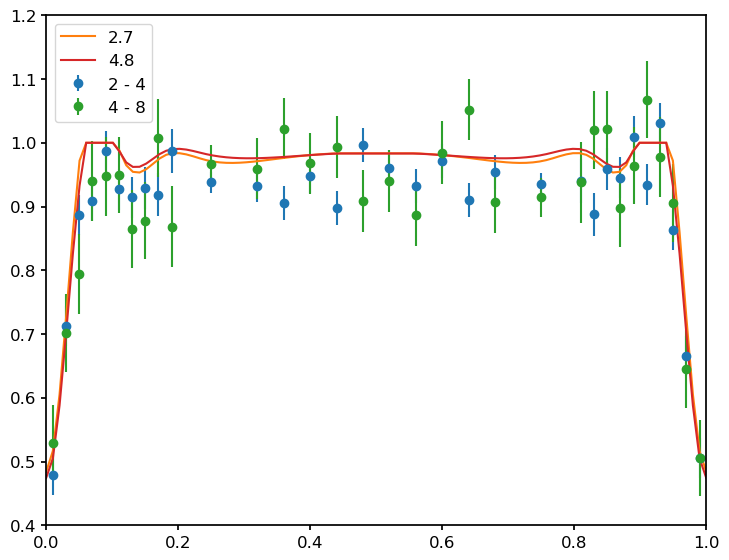

In [29]:
for i, (min_, max_) in pairwise_enum(ENERGY_BINNING):
    plt.errorbar(phase_bins, pol_deg[i,:], pol_deg_err[i,:], fmt='o',
                         label='%g - %g' % (min_, max_))
    energy = numpy.nanmean(emean[i,:])
    print(numpy.nanmean(pol_deg[i,:]),numpy.nanmean(pol_deg_err[i,:]**2/len(pol_deg_err[i,:]))**0.5)

    plt.plot(phase, magnetar.pol_deg(energy, phase),label='%2.1f' % energy        )
plt.legend()


## Plot the polarization angle vs phase

The result should be zero or 180 degrees because we are comparing with the model.

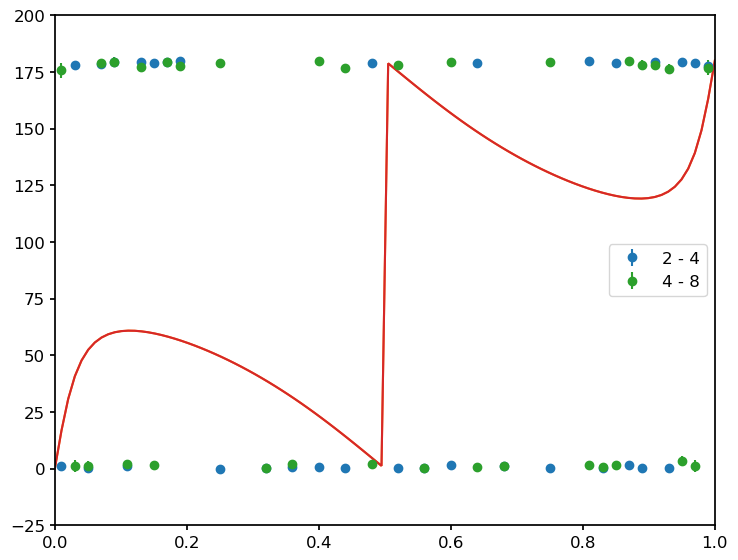

In [30]:
for i, (min_, max_) in pairwise_enum(ENERGY_BINNING):
    plt.errorbar(phase_bins, numpy.mod(pol_ang[i,:],180), pol_ang_err[i,:], fmt='o',
                     label='%g - %g' % (min_, max_))
    energy = numpy.nanmean(emean[i,:])
    plt.plot(phase, numpy.degrees(magnetar.pol_ang(energy, phase) )    )
plt.legend()

# Phase-Averaged Polarization (in the Rotating Frame)

These values will be more useful now because the polarization doesn't get smeared over the period.

## Create the new MCUBE with finer energy bins


In [31]:
ENERGY_BINNING2 = numpy.array([2., 3., 4., 6., 8.])

pipeline.xpbin(*rotated_EVT_FILE_PATH, algorithm='MCUBE', ebinalg='LIST',ebinning=ENERGY_BINNING2,overwrite=True)

>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   632644R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   632644R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_mcube.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631357R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631357R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_mcube.fits...


>>> Done.


>>> Opening input event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  EVENTS        1 BinTableHDU    103   631446R x 18C   [J, J, J, D, J, E, E, E, E, E, E, I, I, E, E, E, E, E]   
  2  MONTE_CARLO    1 BinTableHDU     47   631446R x 9C   [I, E, J, E, E, E, I, I, E]   
  3  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   
  4  ROITABLE      1 BinTableHDU     16   1R x 2C   [I, 20A]   


>>> Setting outfile to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_mcube.fits...


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated.fits...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu3modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu3modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:04.131768', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU3', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xPrimaryHDU     37   ()      
  1  MODULATION    1 xBinTableHDUMCUBE     57   4R x 13C   ['E', 'E', 'E', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '75J']   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Writing MCUBE binned data to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_mcube.fits...


>>> Done.


>>> Closing event file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated.fits...


['/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_mcube.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_mcube.fits',
 '/projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_mcube.fits']

## Load the MCUBE data into Python

In [32]:
file_list = ['%s_mcube.fits'% (s[:-5],)   for s in rotated_EVT_FILE_PATH]

mcube2 = xBinnedModulationCube.from_file_list(file_list)
pol_deg2 = mcube2.pol_deg
pol_deg2_err= mcube2.pol_deg_err
pol_ang2 = mcube2.pol_ang
pol_ang2_err = mcube2.pol_ang_err
emean2 = mcube2.energy_mean

>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1_rotated_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   4R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du2_rotated_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   4R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


>>> Opening input binned file /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_mcube.fits...


Filename: /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du3_rotated_mcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  MODULATION    1 BinTableHDU     57   4R x 13C   [E, E, E, E, J, E, E, E, E, E, E, E, 75J]   
  2  GTI           1 BinTableHDU     29   1R x 2C   [D, D]   


>>> Underlying binned file closed.


## Plot the angle vs energy

<ErrorbarContainer object of 3 artists>

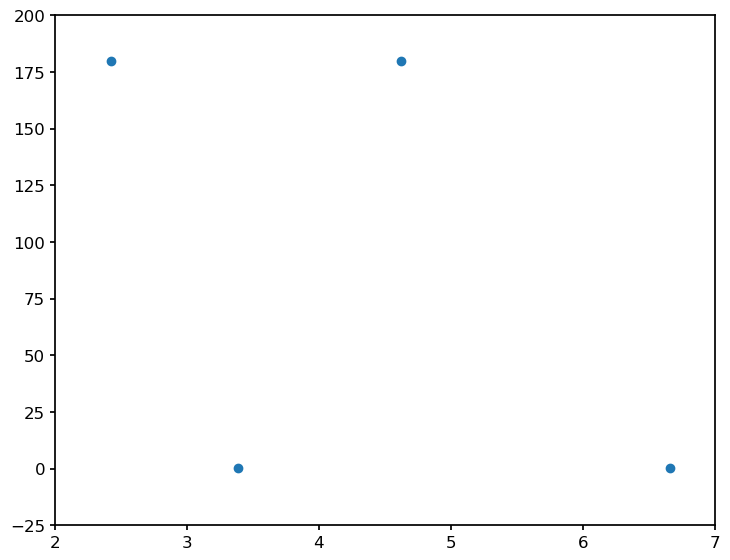

In [33]:
plt.errorbar(emean2, numpy.mod(pol_ang2,180), pol_ang2_err, fmt='o') 

## Plot the degree vs energy

<ErrorbarContainer object of 3 artists>

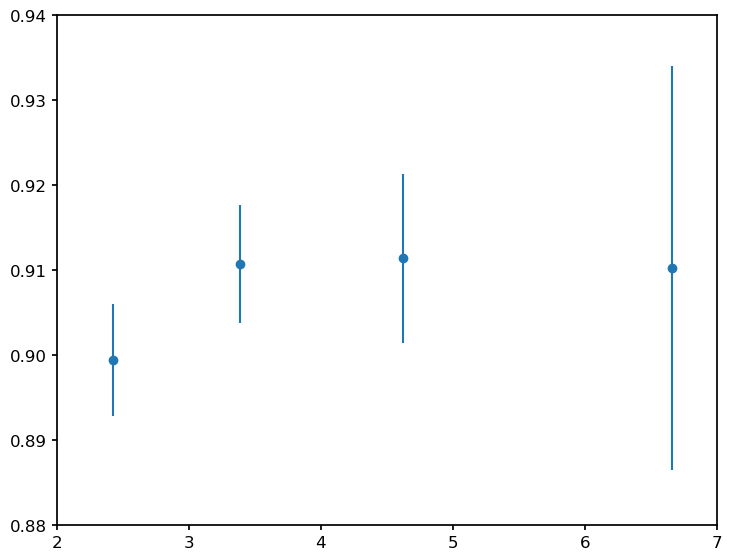

In [34]:
plt.errorbar(emean2, pol_deg2, pol_deg2_err, fmt='o')

## Q/I as a function of energy

Text(0, 0.5, 'Q/I')

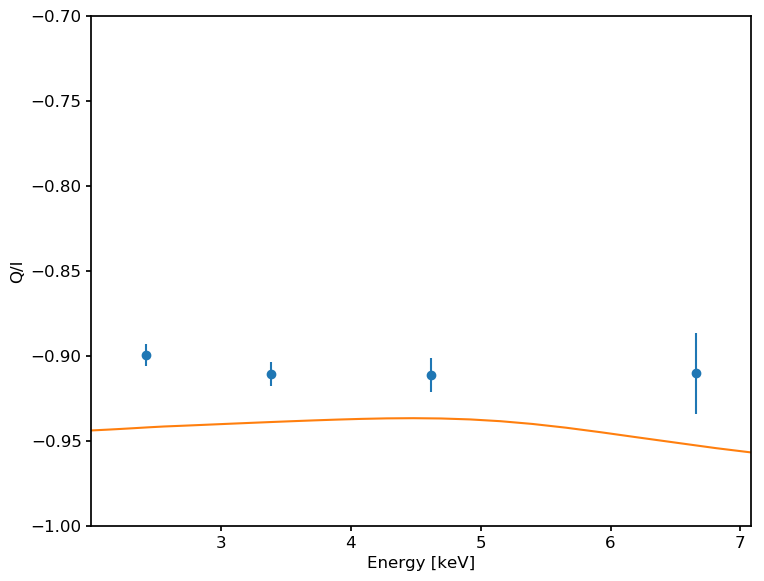

In [35]:
plt.errorbar(emean2, -numpy.cos(numpy.radians(2*pol_ang2))*pol_deg2, pol_deg2_err, fmt='o')
plt.plot(magnetar.enerlist,qfl/mfl)
w=emean2[-1]-emean2[0]
plt.xlim(emean2[0]-0.1*w,emean2[-1]+0.1*w)

plt.xlabel('Energy [keV]')
plt.ylabel('Q/I')